In [39]:
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import pandas as pd
%matplotlib inline

### Load data

In [40]:
df = pd.read_csv('../tent_satellite_imagery/tents/labels_train.csv')

In [41]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,image_1.png,2358,1350,tent,180,417,220,456
1,image_1.png,2358,1350,tent,264,453,306,507
2,image_1.png,2358,1350,tent,313,494,364,563
3,image_1.png,2358,1350,tent,418,500,484,556
4,image_1.png,2358,1350,tent,377,650,427,704


In [42]:
df['class'].value_counts()

tent         223
grass         21
tree          13
truck         12
building      11
dirt road      8
road           3
car            3
Name: class, dtype: int64

In [43]:
df['class'].replace({'tent': 1,
                    'grass': 0,
                    'tree': 0,
                    'truck': 0,
                    'building': 0,
                    'dirt road': 0,
                    'road': 0,
                    'car': 0
                    }, inplace=True)

In [44]:
df['class'].value_counts()

1    223
0     71
Name: class, dtype: int64

In [49]:
df = df.to_numpy()

In [50]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
boxes = np.array(df) 
encoder = LabelBinarizer()
classes_onehot = encoder.fit_transform( classes_raw )
Y = np.concatenate( [ boxes , classes_onehot ] , axis=1 )
X = np.array( images )
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.1 )

NameError: name 'classes_raw' is not defined

### Print Data types

In [1]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

NameError: name 'X_train' is not defined

In [2]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

NameError: name 'X_train' is not defined

In [18]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

### Show image as picture and print label

The label is [6]


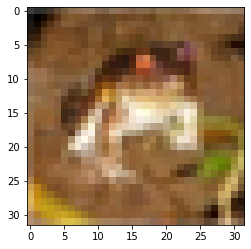

In [24]:
image = plt.imshow(x_train[0])
print('The label is', y_train[0])

### One hot encoding

In [25]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### Print an example of the new labels

In [26]:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [27]:
### Normalize the pixels to be values between 0 and 1

In [28]:
x_train = x_train / 255
x_test = x_test / 255

### Build CNN - create the architecture, convolution layer, Max pooling layer, flatten layer, and neurons

In [35]:
# architecture
model = Sequential()

# convolution layer
model.add( Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)) )

# MaxPooling layer
model.add( MaxPooling2D(pool_size =(2, 2)) )

# convolution layer
model.add( Conv2D(32, (5, 5), activation='relu') )

# MaxPooling layer
model.add( MaxPooling2D(pool_size =(2, 2)) )

# Flatten layer
model.add( Flatten() )

# Neurons
model.add( Dense(1000, activation = 'relu'))
model.add( Dense(10, activation = 'softmax'))

### Compile the model

In [37]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Fit the model

In [38]:
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.6729 - accuracy: 0.3950 - val_loss: 1.4800 - val_accuracy: 0.4612
Epoch 2/10
35000/35000 [==============================] - 44s 1ms/step - loss: 1.3570 - accuracy: 0.5166 - val_loss: 1.2869 - val_accuracy: 0.5409
Epoch 3/10
35000/35000 [==============================] - 40s 1ms/step - loss: 1.2106 - accuracy: 0.5703 - val_loss: 1.1999 - val_accuracy: 0.5809
Epoch 4/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.1065 - accuracy: 0.6113 - val_loss: 1.1270 - val_accuracy: 0.6019
Epoch 5/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.0383 - accuracy: 0.6365 - val_loss: 1.1251 - val_accuracy: 0.6133
Epoch 6/10
35000/35000 [==============================] - 47s 1ms/step - loss: 0.9593 - accuracy: 0.6648 - val_loss: 1.0937 - val_accuracy: 0.6171
Epoch 7/10
35000/35000 [==============================] - 43s 1ms/st

### Model accuracy

In [39]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 4s 448us/step


0.636900007724762

### Make a plot to show accuracy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


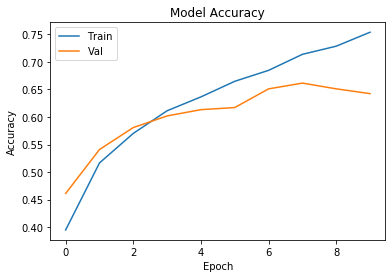

In [45]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upperleft')
plt.show()

### Make a plot to show Model Loss

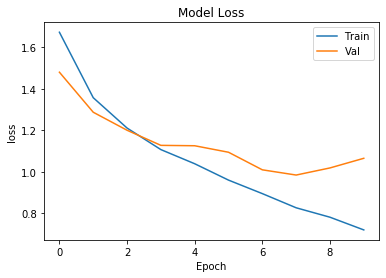

In [46]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc= 'upper right');

### Load image data

In [47]:
my_img = plt

In [48]:
my_img

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [50]:
sudo apt-get install pyqt5-dev-tools
sudo pip3 install -r requirements/requirements-linux-python3.txt
make qt5py3
python3 labelImg.py
python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]

SyntaxError: invalid syntax (<ipython-input-50-dc587d45f9e9>, line 1)

In [51]:
sudo apt-get install pyqt5-dev-tools

SyntaxError: invalid syntax (<ipython-input-51-7492004f4edf>, line 1)